# <font color = "lime"> INTRODUÇÃO </font>
---

Este Colab notebook faz parte de um trabalho para a disciplina de Cálculo 3, cuja temática é <font color = "lime">`Método de Euler para Solução de Problemas de EDO com PVI`</font>. Aqui, pode-se encontrar:
+ Implementação do Método de Euler Explícito
+ Implementação do Método de Euler Implícito + Método de Newton
+ Função para o cálculo numérico de derivadas centradas
+ Plots dos gráficos dos experimentos

Para ir diretamente para uma seção específica, selecione-a no botão de "índice" posicionado na barra lateral esquerda.

Caso os resultados não estejam pré-carregados nas células, ou por algum outro motivo seja necessário executar os códigos novamente, recomenda-se executar todas as células na ordem em que aparecem para evitar erros de dependência de código. Ou então, execute todas de uma vez usando o atalho `Ctrl + F9`.
<br><br><br>

**Autores:**
+ [Florindo Rian Silva Carreteiro](https://github.com/florindorian)
+ [Myrna Gabrielle Bastos de Castro](https://github.com/gabriellebcastro)
+ [Paulo Beckman Santos Baia](https://github.com/paulobeckman)

**Publicado em:** Fevereiro de 2025

**Última atualização:** 27/02/2025

## <font color='lime'>Bibliotecas</font>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time
import re

---
## <font color='lime'>Métodos Numéricos</font>

In [ ]:
def derivada(func, *args, num_var: int):
  '''
  Derivada centrada da função "func" em relação à "num_var"-ésima variável
  '''
  h = 1e-10

  args_h_avancado, args_h_recuado = list(args), list(args)
  args_h_avancado[num_var-1] = args_h_avancado[num_var-1] + h
  args_h_recuado[num_var-1] = args_h_recuado[num_var-1] - h

  return (func(*args_h_avancado) - func(*args_h_recuado)) / (2*h)

In [ ]:
def newton_eq_implicita(F_diferencial, x_next, y_prev, delta_x, max_iter=100, tol=1e-6):
    '''
    Resolve a equação implícita do Método de Euler
    '''

    y_next = y_prev  # Chute inicial
    for _ in range(max_iter):
        # 0 = y_next - const1 - const2 * F_diferencial(const3, y_next)
        G = y_next - y_prev - delta_x * F_diferencial(x_next, y_next)
        # Derivada de G em relação a y_next
        dG = 1 - delta_x * derivada(F_diferencial, x_next, y_next, num_var=2)

        y_new = y_next - G / dG
        if abs(y_new - y_next) < tol: # Verifica se a diferença entre a nova estimativa e a anterior está abaixo da tolerância
            return y_new
        y_next = y_new

    return y_next  # Retorna a aproximação final

In [ ]:
def euler_implicito(F_diferencial, x0, y0, delta_x, xn, imp_file_name):
    x, y = x0, y0
    outputs = []

    with open(imp_file_name, 'w') as arquivo:
        arquivo.write(f"\nMétodo de Euler Implícito: \nx\ty\n{x:.6f}\t{y:.6f}\n")
        outputs.append((x,y))
        # print("\nMétodo de Euler Implícito:")
        # print("x\ty")
        # print(f"{x:.6f}\t{y:.6f}")

        t_i = time()
        while abs(x) < abs(xn):
            x += delta_x
            y = newton_eq_implicita(F_diferencial, x, y, delta_x)

            outputs.append((x,y))
            arquivo.write(f"{x:.6f}\t{y:.6f}\n")
            # print(f"{x:.6f}\t{y:.6f}")
        t_f = time()

    return outputs, (t_f - t_i) # tempo do algoritmo

In [ ]:
def euler_explicito(F_diferencial, x0, y0, h, xn, exp_file_name):
    x, y = x0, y0
    outputs = []

    with open(exp_file_name, 'w') as arquivo:
        arquivo.write(f"\nMétodo de Euler Explícito: \nx\ty\n{x:.6f}\t{y:.6f}\n")
        outputs.append((x,y))

        # print("\nMétodo de Euler Explícito:")
        # print("x\ty")
        # print(f"{x:.6f}\t{y:.6f}")

        t_i = time()
        while abs(x) < abs(xn):
            y += h * F_diferencial(x, y)
            x += h

            outputs.append((x,y))
            arquivo.write(f"{x:.6f}\t{y:.6f}\n")
            # print(f"{x:.6f}\t{y:.6f}")
        t_f = time()

    return outputs, (t_f - t_i) # tempo do algoritmo

---
## <font color='lime'>Script Principal</font>

In [ ]:
def main(F_diferencial, x0, y0, xn=1.0, passo=1e-1, imp_file_name='imp_exp.txt', exp_file_name='out_exp.txt'):
    # xn: Valor final de x
    passo = passo if (xn > x0) else -passo # Adapta a direção do passo dependendo da ordem numérica entre x0 e xn

    out_exp, tempo_exp = euler_explicito(F_diferencial, x0, y0, passo, xn, exp_file_name)
    out_imp, tempo_imp = euler_implicito(F_diferencial, x0, y0, passo, xn, imp_file_name)

    return out_exp, tempo_exp, out_imp, tempo_imp

### <font color='skyblue'>Problema 1</font> (Q27_Sec9.5_pg.561)
**Circuito elétrico com gerador de tensão constante**

$\dfrac{dI}{dt} = \dfrac{E}{L} - \dfrac{R}{L}\cdot I$

<br>

+ E(t) = 40 [V]
+ L = 2 [H]
+ R = 10 [$\Omega$]

<font color='red'>
<strong>EDO:<strong>
$\dfrac{dI}{dt} = 20 - 5\cdot I$</font><br><br>

<font color='red'>
<strong>PVI:<strong>
$I(0) = 0$</font>

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 20 - 5*y

# PROBLEMA DE VALOR INICIAL
x0 = 0.0  # Valor inicial de x
y0 = 0.0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao(x):
    return 4 - 4*np.exp(-5*x)

---

In [ ]:
TENTATIVAS = 10
PROBLEMA = 'PV1'

tempos = {
    PROBLEMA + '_p=1e-1_imp': [],
    PROBLEMA + '_p=1e-1_exp': [],
    PROBLEMA + '_p=1e-2_imp': [],
    PROBLEMA + '_p=1e-2_exp': [],
    PROBLEMA + '_p=1e-3_imp': [],
    PROBLEMA + '_p=1e-3_exp': [],
    PROBLEMA + '_p=1e-4_imp': [],
    PROBLEMA + '_p=1e-4_exp': [],
    PROBLEMA + '_p=1e-5_imp': [],
    PROBLEMA + '_p=1e-5_exp': []
}

for passo in (1e-1, 1e-2, 1e-3, 1e-4, 1e-5):
    chave_imp = PROBLEMA + '_p='+f'{passo:.0e}'.replace('e-0', 'e-')+'_imp'
    chave_exp = PROBLEMA + '_p='+f'{passo:.0e}'.replace('e-0', 'e-')+'_exp'

    for i in range(TENTATIVAS):
        # -- Chama o Script Principal e salva as saídas
        imp_file_name = 'out_imp.txt'
        exp_file_name = 'out_exp.txt'
        # out_exp1, out_imp1 : saídas dos cálculos em váriaveis na memória
        out_exp, tempo_exp, out_imp, tempo_imp = main(
            F_diferencial=F_diferencial,
            x0=x0,
            y0=y0,
            xn=1.0,
            passo=passo,
            imp_file_name=imp_file_name,
            exp_file_name=exp_file_name
        )

        tempos[chave_imp].append(tempo_imp)
        tempos[chave_exp].append(tempo_exp)

tempos_p1 = tempos.copy()

In [ ]:
# display(tempos_p1)

### <font color='skyblue'>Problema 2</font> (Ex5_Sec9.5_pg.560)
**Circuito elétrico com gerador de tensão variável**

$\dfrac{dI}{dt} = \dfrac{E}{L} - \dfrac{R}{L}\cdot I$

<br>

+ E(t) = $60\cdot sen(30\cdot t)$ [V]
+ L = 4 [H]
+ R = 12 [$\Omega$]

<font color='red'>
<strong>EDO:<strong>
$\dfrac{dI}{dt} = 15\cdot sen(30\cdot t) - 3\cdot I$</font><br><br>

<font color='red'>
<strong>PVI:<strong>
$I(0) = 0$</font>

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return 15*np.sin(30*x) - 3*y

# PROBLEMA DE VALOR INICIAL
x0 = 0  # Valor inicial de x
y0 = 0  # Valor inicial de y

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao(x):
    return 5/101 * (np.sin(30*x) - 10*np.cos(30*x)) + 50/101 * np.exp(-3*x)

---

In [ ]:
TENTATIVAS = 10
PROBLEMA = 'PV2'

tempos = {
    PROBLEMA + '_p=1e-1_imp': [],
    PROBLEMA + '_p=1e-1_exp': [],
    PROBLEMA + '_p=1e-2_imp': [],
    PROBLEMA + '_p=1e-2_exp': [],
    PROBLEMA + '_p=1e-3_imp': [],
    PROBLEMA + '_p=1e-3_exp': [],
    PROBLEMA + '_p=1e-4_imp': [],
    PROBLEMA + '_p=1e-4_exp': [],
    PROBLEMA + '_p=1e-5_imp': [],
    PROBLEMA + '_p=1e-5_exp': []
}

for passo in (1e-1, 1e-2, 1e-3, 1e-4, 1e-5):
    chave_imp = PROBLEMA + '_p='+f'{passo:.0e}'.replace('e-0', 'e-')+'_imp'
    chave_exp = PROBLEMA + '_p='+f'{passo:.0e}'.replace('e-0', 'e-')+'_exp'

    for i in range(TENTATIVAS):
        # -- Chama o Script Principal e salva as saídas
        imp_file_name = 'out_imp.txt'
        exp_file_name = 'out_exp.txt'
        # out_exp1, out_imp1 : saídas dos cálculos em váriaveis na memória
        out_exp, tempo_exp, out_imp, tempo_imp = main(
            F_diferencial=F_diferencial,
            x0=x0,
            y0=y0,
            xn=1.0,
            passo=passo,
            imp_file_name=imp_file_name,
            exp_file_name=exp_file_name
        )

        tempos[chave_imp].append(tempo_imp)
        tempos[chave_exp].append(tempo_exp)

tempos_p2 = tempos.copy()

In [ ]:
# display(tempos_p2)

### <font color='skyblue'>Problema 3</font> (pg. 549)
**Crescimento populacional natural**

In [ ]:
# DEFINIÇÃO DA FUNÇÃO QUE REPRESENTA A EDO
def F_diferencial(x, y):
    return y

# PROBLEMA DE VALOR INICIAL
x0 = 0  # Valor inicial de x
y0 = 2  # Valor inicial de y
xn = 8  # Valor final de x

In [ ]:
# FUNÇÃO SOLUÇÃO DA EDO COM PVI
def f_solucao(x):
    # P0 * e^(taxa * x)
    return y0 * np.exp(x)

---

In [ ]:
TENTATIVAS = 10
PROBLEMA = 'PV3'

tempos = {
    PROBLEMA + '_p=1e-1_imp': [],
    PROBLEMA + '_p=1e-1_exp': [],
    PROBLEMA + '_p=1e-2_imp': [],
    PROBLEMA + '_p=1e-2_exp': [],
    PROBLEMA + '_p=1e-3_imp': [],
    PROBLEMA + '_p=1e-3_exp': [],
    PROBLEMA + '_p=1e-4_imp': [],
    PROBLEMA + '_p=1e-4_exp': [],
    PROBLEMA + '_p=1e-5_imp': [],
    PROBLEMA + '_p=1e-5_exp': []
}

for passo in (1e-1, 1e-2, 1e-3, 1e-4, 1e-5):
    chave_imp = PROBLEMA + '_p='+f'{passo:.0e}'.replace('e-0', 'e-')+'_imp'
    chave_exp = PROBLEMA + '_p='+f'{passo:.0e}'.replace('e-0', 'e-')+'_exp'

    for i in range(TENTATIVAS):
        # -- Chama o Script Principal e salva as saídas
        imp_file_name = 'out_imp.txt'
        exp_file_name = 'out_exp.txt'
        # out_exp1, out_imp1 : saídas dos cálculos em váriaveis na memória
        out_exp, tempo_exp, out_imp, tempo_imp = main(
            F_diferencial=F_diferencial,
            x0=x0,
            y0=y0,
            xn=1.0,
            passo=passo,
            imp_file_name=imp_file_name,
            exp_file_name=exp_file_name
        )

        tempos[chave_imp].append(tempo_imp)
        tempos[chave_exp].append(tempo_exp)

tempos_p3 = tempos.copy()

In [ ]:
# display(tempos_p3)

<hr color='orange'>

## <font color='orange'>Análise dos tempos de execução</font>


In [ ]:
tempos = {}
tempos |= (tempos_p1 | tempos_p2 | tempos_p3)

df_tempos = pd.DataFrame(
    data=tempos
)

df_tempos

,PV1_p=1e-1_imp,PV1_p=1e-1_exp,PV1_p=1e-2_imp,PV1_p=1e-2_exp,PV1_p=1e-3_imp,PV1_p=1e-3_exp,PV1_p=1e-4_imp,PV1_p=1e-4_exp,PV1_p=1e-5_imp,PV1_p=1e-5_exp,...,PV3_p=1e-1_imp,PV3_p=1e-1_exp,PV3_p=1e-2_imp,PV3_p=1e-2_exp,PV3_p=1e-3_imp,PV3_p=1e-3_exp,PV3_p=1e-4_imp,PV3_p=1e-4_exp,PV3_p=1e-5_imp,PV3_p=1e-5_exp
0,0.000093,0.000032,0.000380,0.000208,0.005121,0.001209,0.032950,0.011414,0.327531,0.107513,...,0.000083,0.000026,0.000524,0.000170,0.002759,0.001001,0.028249,0.010824,0.295761,0.099404
1,0.000106,0.000026,0.000340,0.000134,0.003349,0.001158,0.032716,0.011018,0.632386,0.194600,...,0.000081,0.000025,0.000344,0.000103,0.002869,0.001278,0.027888,0.010106,0.285894,0.096586
2,0.000093,0.000025,0.000355,0.000104,0.003218,0.001060,0.033318,0.010825,0.610138,0.213153,...,0.000066,0.000034,0.000304,0.000095,0.002748,0.000950,0.028892,0.010175,0.290065,0.114452
3,0.000079,0.000025,0.000329,0.000103,0.003179,0.001012,0.040077,0.011636,0.571235,0.214752,...,0.000066,0.000022,0.000292,0.000094,0.002750,0.000946,0.029125,0.010532,0.293003,0.108308
4,0.000061,0.000039,0.000323,0.000122,0.004746,0.001029,0.033174,0.016154,0.340929,0.109166,...,0.000075,0.000022,0.000307,0.000097,0.002746,0.000935,0.028416,0.009998,0.301013,0.111012
5,0.000063,0.000022,0.000350,0.000100,0.003553,0.001089,0.032150,0.010726,0.329331,0.115375,...,0.000063,0.000030,0.000292,0.000095,0.002799,0.000937,0.028963,0.010230,0.284876,0.108567
6,0.000067,0.000024,0.000325,0.000099,0.003300,0.001047,0.032238,0.010488,0.328527,0.129637,...,0.000060,0.000022,0.000328,0.000100,0.002772,0.000941,0.028761,0.010494,0.321860,0.112322
7,0.000067,0.000024,0.000360,0.000099,0.003480,0.001065,0.034115,0.010566,0.345161,0.109246,...,0.000071,0.000023,0.000295,0.000111,0.002811,0.000926,0.042518,0.010096,0.538187,0.195767
8,0.000063,0.000022,0.000365,0.000112,0.003210,0.001076,0.032485,0.010769,0.365541,0.105609,...,0.000077,0.000021,0.000272,0.000093,0.002799,0.001063,0.030162,0.011203,0.521100,0.193474
9,0.000062,0.000022,0.000320,0.000102,0.003226,0.001012,0.036094,0.010954,0.327866,0.117666,...,0.000058,0.000020,0.000281,0.000095,0.013581,0.000999,0.033535,0.010003,0.526931,0.194998


In [ ]:
df_tempos.to_csv('df_tempos3.csv')

In [ ]:
dados.groupby(["passo", "variable"])["value"].median().reset_index(level=0).index

Index(['PV1_passo=1e-1_exp', 'PV1_passo=1e-1_imp', 'PV2_passo=1e-1_exp',
       'PV2_passo=1e-1_imp', 'PV3_passo=1e-1_exp', 'PV3_passo=1e-1_imp',
       'PV1_passo=1e-2_exp', 'PV1_passo=1e-2_imp', 'PV2_passo=1e-2_exp',
       'PV2_passo=1e-2_imp', 'PV3_passo=1e-2_exp', 'PV3_passo=1e-2_imp',
       'PV1_passo=1e-3_exp', 'PV1_passo=1e-3_imp', 'PV2_passo=1e-3_exp',
       'PV2_passo=1e-3_imp', 'PV3_passo=1e-3_exp', 'PV3_passo=1e-3_imp'],
      dtype='object', name='variable')

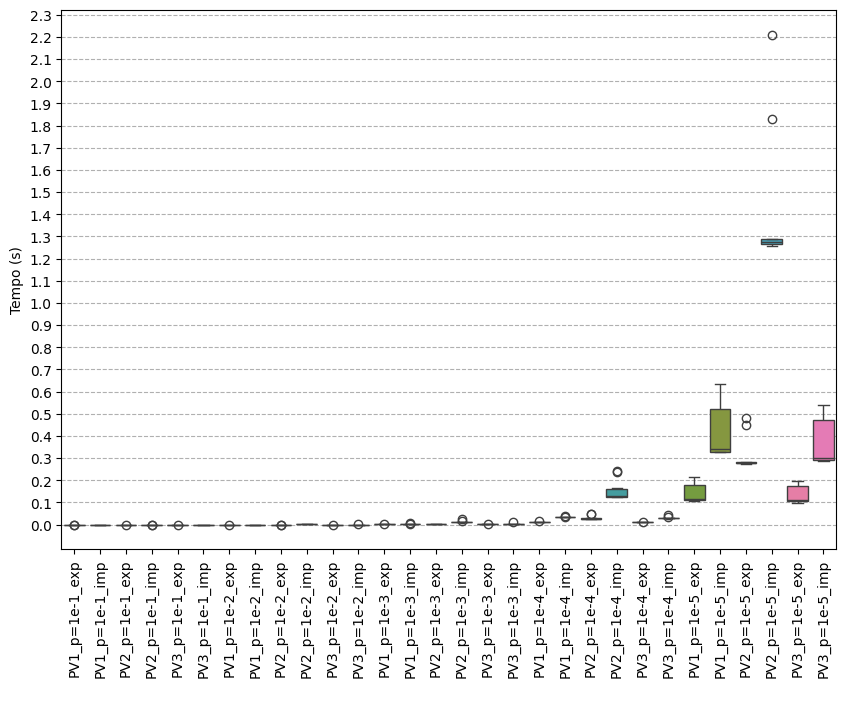

In [ ]:
dados = df_tempos.melt()
dados['passo'] = dados['variable'].apply(
    lambda x: re.search(r'1e-\d', x).group()
)

# -- Ordenando categorias crescentemente com base na mediana
# ordem = dados.groupby("variable")["value"].median().sort_values().index
# -- Ordem com base nos experimentos (valor do passo)
ordem = dados.groupby(["passo", "variable"])["value"].median().reset_index(level=0).index

fig, axs = plt.subplots(1,1, figsize=(10,7))

axs.set_ylabel('Tempo (s)')
axs.set_xlabel(' ')
axs.set_yticks([i/10 for i in range(0,26)])
axs.tick_params(axis='x', rotation=90)
axs.grid(linestyle='--')

sns.boxplot(
    data=dados,
    x=dados['variable'],
    y=dados['value'],
    hue=dados['variable'],
    legend=False,
    ax=axs,
    order=ordem
)

plt.savefig("boxplots-tempos.svg", format="svg", bbox_inches="tight", pad_inches=0)
plt.show()